# Difficulty of Decryption Level of
## of Academic and Popular and Psuedo scientific Language

In [1]:
import pickle
import matplotlib
#matplotlib.use('agg')
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#if #1 == 2: # uncomment to break try
try:
    #assert 1==2
    with open('unraveled_links.p','rb') as handle:
        unravel = pickle.load(handle)

except:
    import sclat
    import dask.bag as db
    from t_analysis_purepy import web_iter, map_wrapper
    query_list = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Neutron', 'Play Dough']
    list_per_links = map_wrapper(web_iter,query_list) 
    #grid = db.from_sequence(query_list,npartitions = 8)
    #list_per_links = list(db.map(web_iter,grid).compute());
    remove_empty = [i for i in list_per_links if len(i)>0 ]
    unravel = []
    for i in remove_empty:
        unravel.extend(i)
    with open('unraveled_links.p','wb') as handle:
        pickle.dump(unravel,handle)
    print(unravel)    
import pandas as pd


# Sanity Check

In [2]:
# 50 links
# 6 search terms
# 5 search engines

# Move this code into the end of t_analysis

pe = 50 * 6 # links per engine
pt = 50 * 5 # links per search term

query_list = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Neutron', 'Play Dough']

engine_list = ['google_','gScholar_','bing_','yahoo_', 'duckduckgo_']
crude_text = [ f for f in unravel ] 


gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
print(pe,len(gsc_text))
#assert len(gsc_text) == pe

for q in engine_list:
    check = list(filter(lambda x: x['urlDat']['se'] == q, crude_text))
    print(pe,len(gsc_text))

    #assert len(check) == pe 

for q in query_list:
    check = list(filter(lambda x: x['urlDat']['keyword'] == q, crude_text))
    print(pt,len(gsc_text))

    #assert len(check) == pt 
    
# total number of words


300 19
300 19
300 19
300 19
300 19
300 19
250 19
250 19
250 19
250 19
250 19
250 19


In [3]:
#print(unravel)
freqs = [  u['frequencies'] for u in unravel ]

freqs = [ (v,k) for f in freqs for k,v in f  ]
# create a dictionary of container keys with all values set to 0.
# Giant model is a federated model of histograms
giantmodel = { fs[0]:0 for fs in freqs }
# if fdict already has count data for that word/token add currently found count data to existing data.
for i in freqs:
    giantmodel[str(i[0])] = giantmodel[str(i[0])] + i[1]
    
wt = len(giantmodel)
#allw_ = list(filter(lambda x: x['urlDat'] == q, crude_text))
#allw = 
#wtpe = 
#wtpt =    
        

6.34614670376
2.10886745382
0.0
8.081362951558031
9.489834645647539
0.03074416781304637


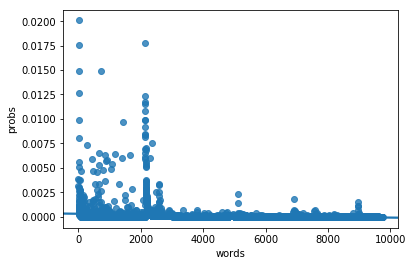

In [4]:

gm = sum([ v for k,v in giantmodel.items() ])    
probs = [ (float(v)/gm, k) for k,v in giantmodel.items() ]
probs = [ (p[0],p[1]) for p in probs if p[0] > 0.]
ents = {}
ent = 0
import math
for p in probs:
    if p[0] > 0.:
        ent -= p[0] * math.log(p[0], 2)
        ents[p[1]] = ent
#obj_arr['eofh'] = ent

#print(fdicts)
import pdb
#pdb.set_trace()
#federate_frequencies =  []
yentropies = [ v['eofh'] for v in unravel ]
import numpy as np
print(np.mean(yentropies))
print(np.var(yentropies))
print(min(yentropies))
print(max(yentropies))
print(max([v for v in ents.values() ]))
print(min([v for v in ents.values() ]))

wns = [ x for x in range(0,len(ents)) ]
#plt.clf()
#plt.plot(wns,list(ents.values()))
#plt.title('Word entropy of unigram model frequency histogram')
#plt.xlabel('per word out of 14000 words')a
#plt.plot(wns,bing_entropies)
#plt.plot(wns,ddg_entropies)
#plt.show()

probs = [i[0] for i in probs]
import pandas as pd
d = {'words': wns, 'probs': probs}
df = pd.DataFrame(data=d)
ax = sns.regplot(x='words', y='probs', data=df)
plt.show()


In [ ]:
stat_items = [ f['urlDat'] for f in unravel ] 

unravel[0]['urlDat'];
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from scipy.stats import pearsonr
import numpy as np

rfr = RandomForestRegressor(n_estimators=25)
lm = LinearRegression()

features = [ list(c['urlDat'].values())[0:-1] for c in crude_text ]
feature_labels = [ list(c['urlDat'].keys())[0:-1] for c in crude_text ]

#import pdb
#pdb.set_trace()
import pandas as pd
d = {j:features for i,j in enumerate(feature_labels) }
d = {'words': wns, 'probs': probs}
dff = pd.DataFrame(data=d)

#ax = sns.regplot(x='words', y='probs', data=df)


print(len(yentropies))
#print(len(word_names))
print(len(ents))

gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
ddg_text = list(filter(lambda x: x['urlDat']['se'] == 'duckduckgo_', crude_text))
bing_text = list(filter(lambda x: x['urlDat']['se'] == 'bing_', crude_text))
gword_names = [ c['urlDat']['keyword'] for c in gsc_text ]
#print(gword_names)
gsc_entropies = [e['eofh'] for e in gsc_text if e['urlDat']['se'] == 'gScholar_' ]
bing_entropies = [e['eofh'] for e in bing_text if e['urlDat']['se'] == 'bing_']
ddg_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'duckduckgo_'] 
yahoo_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'yahoo_'] 
google_entropies = [e['eofh'] for e in ddg_text if e['urlDat']['se'] == 'google_'] 

wns = [ x for x in range(0,len(gsc_text)) ]
plt.clf()
fig, ax = plt.subplots()

plt.plot([ x for x in range(0,len(gsc_entropies)) ],gsc_entropies,label='google scholar')
plt.plot([ x for x in range(0,len(bing_entropies)) ],bing_entropies,label='bing scholar')
plt.plot([ x for x in range(0,len(ddg_entropies)) ],ddg_entropies,label='duck duck go')
plt.plot([ x for x in range(0,len(yahoo_entropies)) ],yahoo_entropies,label='yahoo')
plt.plot([ x for x in range(0,len(google_entropies)) ],google_entropies,label='google')
legend = ax.legend(loc='upper center')

plt.show()

print(len(ddg_text),len(crude_text),len(bing_text))


all_entropies = [e['eofh'] for e in crude_text ] 


all_entropies = [e['eofh'] for e in crude_text ] 
plt.clf()
plt.plot([i for i,j in enumerate(all_entropies)],all_entropies)
plt.title('all entropies')
plt.show()
all_polarities =[e['urlDat']['sp'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_polarities)],all_polarities)
plt.title('all polarities')
plt.show()
print(len(unravel))
print(np.shape(unravel))


all_subjectivities =[e['urlDat']['ss'] for e in crude_text ] 

plt.clf()
plt.plot([i for i,j in enumerate(all_subjectivities)],all_subjectivities)
plt.title('all subjectivities')
plt.show()


print(len(unravel))
print(np.shape(unravel))
#print(ddg_text[-1])
#print(bing_text[-1])

In [6]:

#print(X)
#Xs = [ j 
      
Xs = []
y = []    
for i in features:
    temp = []      
    for k,j in enumerate(i[:-2]):
        if type(j) is not type(str()):
            
            temp.append(j)
        elif y==3:
            y.append(j)
    Xs.append(temp)          
      
features = np.array(Xs)



print(len(Xs),len(yentropies))
target = yentropies
regressor = rfr.fit(features,target)
lm = lm.fit(features,yentropies)

print('linear model regression')
print(lm.score(features,yentropies))
print('random forest regression')
print(regressor.score(features,target))

regressor.verbose = 1
print(regressor)
from sklearn.linear_model import LinearRegression,Lasso

def scorer(est,X,y):
    """Computes the Pearson correlation between predicted and observed values"""
    predicted = est.predict(X).squeeze()
    actual = y.squeeze()
    if predicted.var()==0:
        r = 0
    else:
        r,p = pearsonr(predicted,actual)    
    return r



288 288
linear model regression
0.920934629714
random forest regression
0.996582720291
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=25, n_jobs=1, oob_score=False, random_state=None,
           verbose=1, warm_start=False)


In [7]:
features[0]

array([  0.00000000e+00,   7.49000000e+02,   1.40000000e+01,
         2.30000000e+01,   1.21374459e-01,   4.91287879e-01,
         1.66000000e+01,  -8.40000000e-01,   1.21000000e+01,
         2.49800000e+01,   2.01000000e+01,   1.94964486e+01,
         9.15000000e+00])

(288, 13)
PC 1 explains 89.4% of the variance
PC 2 explains 8.02% of the variance
PC 3 explains 2.5% of the variance
PC 4 explains 0.0763% of the variance
PC 5 explains 0.00422% of the variance
PC 6 explains 0.00236% of the variance
PC 7 explains 0.00156% of the variance
PC 8 explains 0.000227% of the variance
PC 9 explains 9.39e-05% of the variance
PC 10 explains 2.57e-06% of the variance
PC 11 explains 3.18e-07% of the variance
PC 12 explains 1.31e-07% of the variance
PC 13 explains 1.92e-09% of the variance


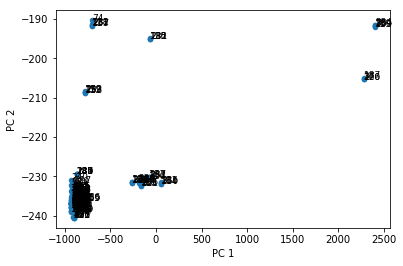

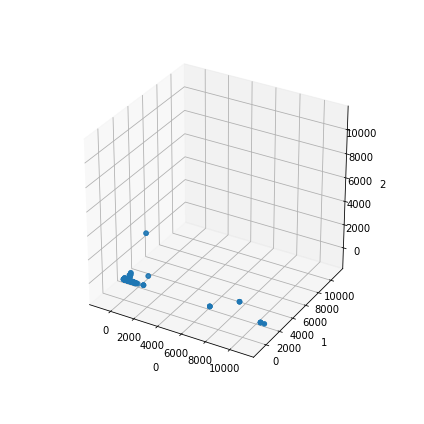

[  5.06531476e-04   9.99546551e-01  -6.62316031e-04  -3.08177950e-04
   5.46501247e-07   1.16726419e-05   8.56507412e-03  -1.46878787e-02
   6.72368047e-04  -2.23521836e-02  -5.00002877e-03   9.54172184e-03
   8.30643645e-04]
[  3.88892563e-03   1.20944363e-02  -3.21131315e-03  -2.83063946e-03
  -1.87875641e-04  -2.27324898e-05   6.11226197e-02  -4.01890138e-01
  -1.27804750e-04   7.03737891e-01   5.82372478e-01   1.25226200e-02
   2.65104012e-03]
[  0.00000000e+00   7.49000000e+02   1.40000000e+01   2.30000000e+01
   1.21374459e-01   4.91287879e-01   1.66000000e+01  -8.40000000e-01
   1.21000000e+01   2.49800000e+01   2.01000000e+01   1.94964486e+01
   9.15000000e+00]


In [8]:

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
#!pip install ipyvolume
from mpl_toolkits.mplot3d import Axes3D
#import ipyvolume.pylab as p3

pca = PCA()
data = features
print(np.shape(features))
pca = PCA(n_components=13).fit(data)
data_rotated = np.dot(pca.components_,data.T).T


        
def report_mean_var(data):
    for i in range(data.shape[1]):
        column = data[:,i]
        print("Dimension %d has mean %.2g and variance %.3g" % \
              (i+1,column.mean(),column.var()))
name='word_complexity'
#summarize(data_rotated,name)        
#report_mean_var(data_rotated)

def variance_explained(df,pca):
    #pca.fit(df.values)
    n_components = min(*df.shape)
    if pca.n_components:
        n_components = min(n_components,pca.n_components)
    for i in range(n_components):
        print("PC %d explains %.3g%% of the variance" % (i+1,100*pca.explained_variance_ratio_[i]))

variance_explained(pd.DataFrame(data_rotated),pca)

reduced_dims = pca.components_#* data 
def annotate_scatter(ax,df_transformed,df):
    for i, txt in enumerate(df.index):
        x_loc = df_transformed['PC 1'].iloc[i]
        y_loc = df_transformed['PC 2'].iloc[i]
        ax.annotate(txt, (x_loc,y_loc), fontsize=9)
    #for i, text in enumerate(df.index):
    #    ax.text(df['PC 1'].iloc[i],df['PC 2'].iloc[i], text)
        
def plot_transformed_data(pca,df_transformed,df,figsize=None):
    plt.clf()
    #pca.fit(df.values)
    n_components = min(*df.shape)
    if pca.n_components:
        n_components = min(n_components,pca.n_components)
    pca_df = pd.DataFrame(pca.transform(df.values),
                      index=df.index,
                      columns=['PC %d' % (i+1) for i in range(n_components)])
    ax = pca_df.plot.scatter('PC 1','PC 2',figsize=figsize)
    #ax = mds_df.plot.scatter(x='PC 1',y='PC 2',figsize=(12,12))
    #annotate_scatter(ax,mds_df)
    annotate_scatter(ax,pca_df,df_transformed)
    plt.show()
    

plot_transformed_data(pca,pd.DataFrame(data),pd.DataFrame(data_rotated))
        
def plot3d(df):
    plt.clf()
    data = df.values
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*data[:,0:3].T)
    minn,maxx = data.min(),data.max()
    ax.set_xlim(minn,maxx)
    ax.set_ylim(minn,maxx)
    ax.set_zlim(minn,maxx)
    ax.set_xlabel(df.columns[0],labelpad=10)
    ax.set_ylabel(df.columns[1],labelpad=10)
    ax.set_zlabel(df.columns[2],labelpad=10)
    ax.dist = 12
    plt.tight_layout()    
    plt.show()
plot3d(pd.DataFrame(data_rotated))   



In [ ]:
print(reduced_dims[0])
print(reduced_dims[1])
print(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


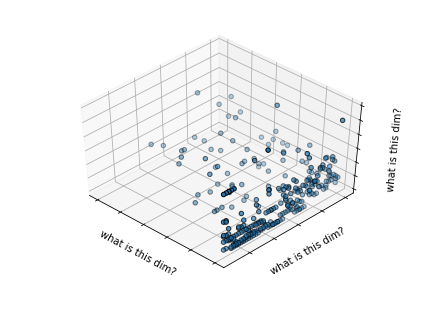

In [9]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
km = KMeans(n_clusters=4)
#km.labels_
clustered = km.fit(features)
clustered.labels_
print(clustered)

#plt.clf()
#plt.scatter(features,c=clustered.labels_)
#plt.xlabel('Voltage @ 0.9 ms')
#plt.ylabel('Voltage @ 1.5 ms');
#plt.show()
fignum = 1
#titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
#for name, est in estimators:
plt.clf()
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
#est.fit(f)
#labels = est.labels_

ax.scatter(features[:, 3], features[:, 0], features[:, 2], edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('what is this dim?')
ax.set_ylabel('what is this dim?')
ax.set_zlabel('what is this dim?')
#ax.set_title(titles[fignum - 1])
ax.dist = 12
fignum = fignum + 1
plt.show()


In [10]:
def my_dendrogram(features,color_threshold,truncate_mode=None,labels=None,no_labels=False,leaf_font_size=14):
    plt.figure(figsize=(17,7))
    Z = linkage(features,method='ward')
    Z[:,2] = Z[:,2]**0.25 # Warp distance for visualization purposes
    dendrogram(
        Z,
        truncate_mode=truncate_mode,  # show only the last p merged clusters
        p=25,  # show only the last p merged clusters
        color_threshold=color_threshold,
        above_threshold_color='black',
        leaf_font_size=leaf_font_size,
        labels=labels,
        no_labels=no_labels,
    );
    plt.ylabel('Intercluster distance')
    if not no_labels:
        plt.xlabel('Cluster sizes');
    plt.show()    
#my_dendrogram(features,1.2,no_labels=True)        

In [11]:
bings = [ f for f in unravel if f['urlDat']['se'] =='bing_']
googles = [ f for f in unravel if f['urlDat']['se'] =='google_']
GMOs = [ f for f in unravel if f['urlDat']['keyword'] =='GMO']
GMO_standard = [ f['urlDat']['standard'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_rank = [ f['urlDat']['link_rank'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_pol = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
GMO_subjectivity_sent = [ f['urlDat']['ss'] for f in unravel if f['urlDat']['keyword'] =='GMO' ]
crude_text = [ f for f in unravel ] 
stat_items = [ f['urlDat'] for f in unravel ] 
gsc_text = list(filter(lambda x: x['urlDat']['se'] == 'gScholar_', crude_text))
unravel[0]['urlDat']
gsc = list(filter(lambda x: x['se'] == 'gScholar_', stat_items))
scholar_wc = [ f['wcount'] for f in gsc ] 

In [12]:
print(scholar_wc)



[870, 689, 113, 113, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157, 157]


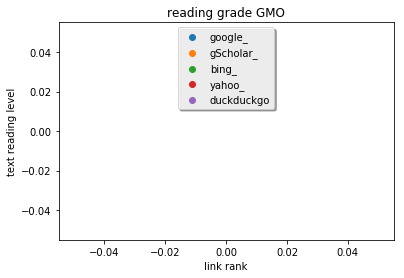

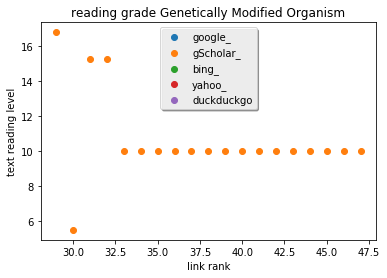

In [13]:
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'
se[4] = 'duckduckgo'

ses = list(se.values())
#search_query = str('Vaccine')
searchList = ['GMO','Genetically_Modified_Organism','Transgenic','Vaccine', 'Play Dough', 'Neutron']
xx = []
yy = []
for outer,search_query in enumerate(searchList):    
    x = []
    y = []
    for i,v in enumerate(ses):
        #print(i,v)
        complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        rank = [ f['urlDat']['link_rank'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        x.append(rank)
        y.append(complexity)
    #if len(xx)!= 0 and len(yy) !=0:
    xx.append(x)
    yy.append(y)
    #print(len(complexity),len(rank))
plt.clf()

fig, ax = plt.subplots()
plt.title(str('reading grade ')+'GMO')
plt.ylabel('text reading level')
plt.xlabel('link rank')
plt.scatter(xx[0][0],yy[0][0],label=ses[0])
plt.scatter(xx[1][0],yy[1][0],label=ses[1])
plt.scatter(xx[2][0],yy[2][0],label=ses[2])
plt.scatter(xx[3][0],yy[3][0],label=ses[3])
plt.scatter(xx[4][0],yy[4][0],label=ses[4])

legend = ax.legend(loc='upper center', shadow=True)
plt.show()
#plt.savefig('rank_versus_complexity_{0}.png'.format(search_query))
plt.clf()

fig, ax = plt.subplots()
plt.title(str('reading grade ')+'Genetically Modified Organism')
plt.ylabel('text reading level')
plt.xlabel('link rank')
plt.scatter(xx[0][1],yy[0][1],label=ses[0])
plt.scatter(xx[1][1],yy[1][1],label=ses[1])
plt.scatter(xx[2][1],yy[2][1],label=ses[2])
plt.scatter(xx[3][1],yy[3][1],label=ses[3])
plt.scatter(xx[4][1],yy[4][1],label=ses[4])

legend = ax.legend(loc='upper center', shadow=True)
plt.show()



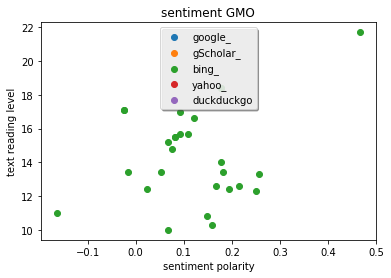

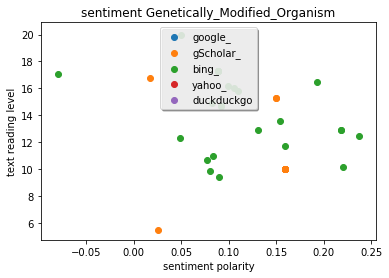

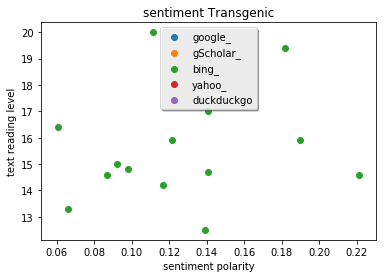

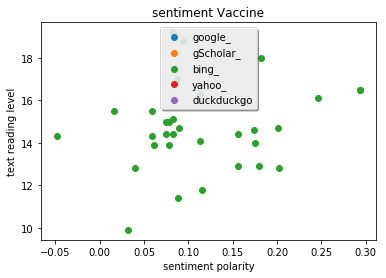

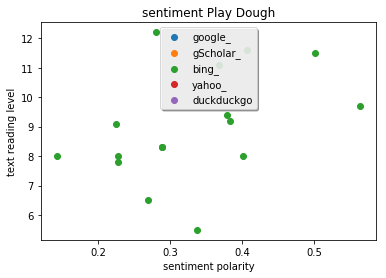

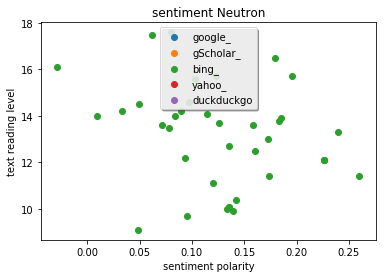

In [14]:
# 2.       Pro/anti/neutral vs. text complexity#

for outer,search_query in enumerate(searchList):    
    x = []
    y = []
    for i,v in enumerate(ses):
        #print(i,v)
        complexity = [ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        sent = [ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] ==search_query and f['urlDat']['se'] == v ]
        #print(complexity[0][0],complexity[0][0])
        x.append(sent)
        y.append(complexity)

    fig, ax = plt.subplots()
    plt.title(str('sentiment ')+search_query)
    plt.ylabel('text reading level')
    plt.xlabel('sentiment polarity')
    labels = [ses[0],ses[1],ses[2],ses[3]]
    
    #import pandas as pd
    #d = {'words': wns, 'probs': probs}
    #df = pd.DataFrame(data=d)
    #ax = sns.regplot(x='words', y='probs', data=df)

    #lineObjects = 
    plt.scatter(x[0],y[0],label=ses[0])
    plt.scatter(x[1],y[1],label=ses[1])
    plt.scatter(x[2],y[2],label=ses[2])
    plt.scatter(x[3],y[3],label=ses[3])
    plt.scatter(x[4],y[4],label=ses[4])
    #plt.scatter(x[5],y[5],label=ses[5])



    legend = ax.legend(loc='upper center', shadow=True)
    plt.savefig('sentiment_vs_complexity{0}.png'.format(search_query))

plt.show()


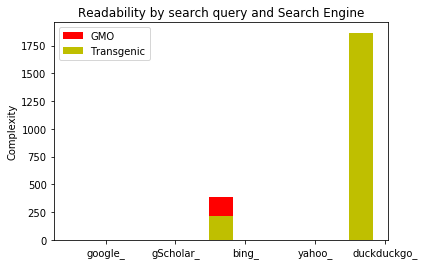

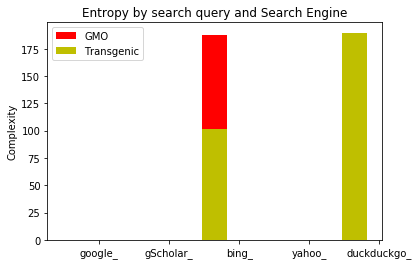

[[0, 0, 390.59999999999997, 0, 930.3000000000003], [0, 0, 218.3, 0, 1866.0000000000002]]
[[0, 0, 188.0316699997446, 0, 112.84665560589497], [0, 0, 101.51283930792623, 0, 189.63217038617773]]


In [15]:
# 3.       GMO/transgenics vs. text complexity

import seaborn as sns
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'
se[4] = 'duckduckgo_'

ses = list(se.values())
#search_query = str('Vaccine')
search_query = ['GMO','Transgenic']
xx=[]
yy=[]
ee=[]
for outer,sq in enumerate(search_query):    
    x = []
    y = []
    e = []
    for i,v in enumerate(ses):
        comp = sum([ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v ])

        entropy = sum([ f['eofh'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v  ])
        #if len(complexity)>0:
         #   comp = float(complexity[0])
        #else:
        #    comp = 0
        xx.append(i)
        y.append(comp)
        e.append(entropy)
    yy.append(y)
    ee.append(e)
    
plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
ind = [i for i,v in enumerate(ses)]
offset = [(i+width) for i,v in enumerate(ses)]
rects1 = ax.bar(ind,yy[0],width, color='r')# yerr=men_std)
rects2 = ax.bar(ind, yy[1], width, color='y')#, yerr=women_std)
# add some text for labels, title and axes ticks
ax.set_ylabel('Complexity')
ax.set_title('Readability by search query and Search Engine')
ax.set_xticks(offset)
ax.set_xticklabels((se[0], se[1], se[2], se[3],se[4]))#, 'G5'))

ax.legend((rects1[0], rects2[0]), ('GMO', 'Transgenic'))
plt.show()


plt.clf()
fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
width = 0.35       # the width of the bars
ind = [i for i,v in enumerate(ses)]
offset = [(i+width) for i,v in enumerate(ses)]
rects1 = ax.bar(ind,ee[0],width, color='r')# yerr=men_std)
rects2 = ax.bar(ind, ee[1], width, color='y')#, yerr=women_std)
ax.set_ylabel('Complexity')
ax.set_title('Entropy by search query and Search Engine')
ax.set_xticks(offset)
ax.set_xticklabels((se[0], se[1], se[2], se[3],se[4]))#, 'G5'))

ax.legend((rects1[0], rects2[0]), ('GMO', 'Transgenic'))
plt.show()
#plt.savefig('GMO_Transgenic_complexity_{0}{1}.png'.format(search_query[0],search_query[1]))
import numpy as np
print(yy)
print(ee)

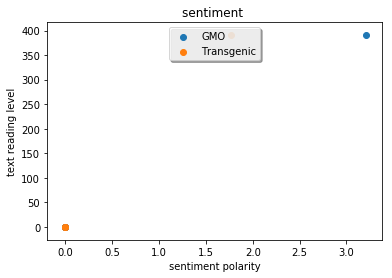

In [16]:

import seaborn as sns
se = {}
se[0] = 'google_'
se[1] = 'gScholar_'
se[2] = 'bing_'
se[3] = 'yahoo_'

ses = list(se.values())
search_query = str('Vaccine')
search_query = ['GMO','Transgenic']
xx=[]
yy=[]
for outer,sq in enumerate(search_query):    
    x = []
    y = []
    for i,v in enumerate(ses):
        comp = sum([ f['urlDat']['fkg'] for f in unravel if f['urlDat']['keyword'] ==sq and f['urlDat']['se'] == v ])
        sent = sum([ f['urlDat']['sp'] for f in unravel if f['urlDat']['keyword'] == sq and f['urlDat']['se'] == v ])

        xx.append(i)
        y.append((comp,sent))    
    yy.append(y)
#print(len(complexity),len(rank))
#fig, ax = plt.subplots()
# Two subplots, the axes array is 1-d
#width = 0.35       # the width of the bars
#plt.clf()
#fig, ax = plt.subplots()

#f, axarr = plt.subplots(1, sharex=True)
ind = [i for i,v in enumerate(ses)]
offset = [(i+width)/2.0 for i,v in enumerate(ses)]


fig.clf()
fig, ax = plt.subplots()
plt.title(str('sentiment '))#+search_query)
plt.ylabel('text reading level')
plt.xlabel('sentiment polarity')
#lineObjects = 
sentt0 = [sent[1] for sent in yy[0] ]
complexity0 = [comp[0] for comp in yy[0] ]
plt.scatter(sentt0,complexity0,label='GMO')
sentt1 = [sent[1] for sent in yy[1] ]
complexity1 = [sent[0] for sent in yy[0] ]
plt.scatter(sentt1,complexity1,label='Transgenic')


legend = ax.legend(loc='upper center', shadow=True)
plt.show()
